# Examen des prédictions du modèle original sur les séquences de test

In [1]:
import json
import numpy as np
import pandas as pd
import sklearn

In [2]:
import h5py
import cooler

In [10]:
from basenji import dataset

In [3]:
import matplotlib.pyplot as plt

In [4]:
predpath = "/home/bureau/projects/def-bureau/bureau/ran-donnees/PredictNeuronHi-C/akita_pred_test/"
predfile = predpath + "preds.h5"

In [5]:
pred = h5py.File(predfile, 'r')
pred

<HDF5 file "preds.h5" (mode r)>

In [6]:
pred.keys()

<KeysViewHDF5 ['preds']>

In [8]:
pred['preds'].shape

(6668, 99681, 5)

In [11]:
#targetfile = "/home/bureau/projects/def-bureau/bureau/distiller/iPSC/data/1s/seqs_cov/0.h5"
data_dir = "/home/bureau/projects/def-bureau/bureau/distiller/iPSC/data/1s/"
test_data = dataset.SeqDataset(data_dir, 'test', batch_size=8)

In [12]:
# Les données de tests sont les 6668 (pred['preds'].shape[0]) dernières
#test_targets = targets['targets'][targets['targets'].shape[0]-pred['preds'].shape[0]:,]
test_targets = test_data.numpy(return_inputs=False, return_outputs=True)

In [13]:
test_targets.shape

(6668, 99681, 1)

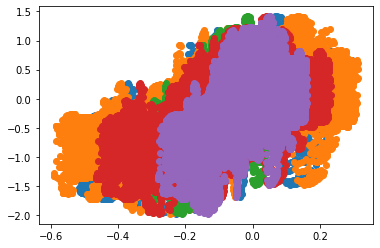

In [16]:
for i in range(5):
    plt.scatter(pred['preds'][0,:,i], test_targets[0,:,0])
plt.show()

## Calcul de l'erreur quadratique moyenne par lignée cellulaire utilisée pour la prédiction

In [14]:
from sklearn.metrics import mean_squared_error
mse_orig = []
for i in range(pred['preds'].shape[2]):
    mse_orig.append(mean_squared_error(test_targets[:,:,0],pred['preds'][:,:,i]))

In [15]:
display(mse_orig)

[0.264, 0.2491, 0.2441, 0.2554, 0.254]

## Calcul de l'erreur quadratique moyenne par lignée cellulaire pour chaque séquence de 1Mb

In [19]:
mse_orig_seq = np.zeros((pred['preds'].shape[0],pred['preds'].shape[2]))
for i in range(pred['preds'].shape[2]):
    for j in range(pred['preds'].shape[0]):
        mse_orig_seq[j,i] = mean_squared_error(test_targets[j,:,0],pred['preds'][j,:,i])

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [20]:
hic_targets = pd.read_csv('/home/bureau/projects/def-bureau/basenji/manuscripts/akita/data/targets.txt',sep='\t')
hic_targets

,index,identifier,file,clip,description
0,0,HFF,../../data/coolers/Krietenstein2019/HFF_hg38_4...,2,HFF
1,1,H1hESC,../../data/coolers/Krietenstein2019/H1hESC_hg3...,2,H1hESC
2,2,GM12878,../../data/coolers/Rao2014/GM12878_inSitu_MboI...,2,GM12878
3,3,IMR90,../../data/coolers/Rao2014/IMR90_inSitu_MboI_a...,2,IMR90
4,4,HCT116,../../data/coolers/Rao2017/Unsynchronized_all....,2,HCT116


In [21]:
mse_orig_dat = pd.DataFrame(mse_orig_seq,columns=hic_targets['identifier'])
mse_orig_dat

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
0,0.160034,0.152710,0.182983,0.167480,0.192261
1,0.127441,0.130371,0.127075,0.126343,0.127319
2,0.530762,0.413330,0.311768,0.530762,0.309326
3,0.270264,0.201782,0.179688,0.261963,0.168701
4,0.213379,0.182251,0.169922,0.194824,0.169067
...,...,...,...,...,...
6663,0.241333,0.199463,0.167358,0.232666,0.163940
6664,0.244995,0.234375,0.201904,0.227661,0.192871
6665,0.229980,0.171997,0.155640,0.213745,0.146851
6666,0.203003,0.191040,0.209229,0.195557,0.226562


In [22]:
#mse_var = map(lambda x : x.var(), list(mse_orig_dat.columns))
mse_orig_dat.mean()

identifier
HFF        0.263857
H1hESC     0.249176
GM12878    0.244110
IMR90      0.255425
HCT116     0.253856
dtype: float64

In [23]:
mse_orig_dat.to_csv("mse_orig_dat.csv")

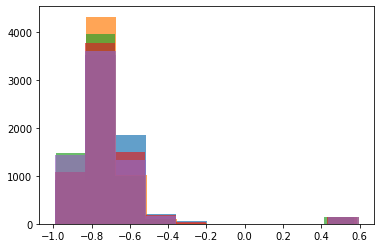

In [24]:
mse_orig_tr = mse_orig_seq.transpose()
for i in range(len(mse_orig_tr)) :
    plt.hist(np.log10(mse_orig_tr[i]),alpha=0.7)
plt.show()

In [17]:
from sklearn.metrics import explained_variance_score
r2_orig = []
for i in range(pred['preds'].shape[2]):
    r2_orig.append(explained_variance_score(test_targets[:,:,0],pred['preds'][:,:,i]))

In [18]:
display(r2_orig)

[0.15974368391418625,
 0.20205152189390405,
 0.2205316404643312,
 0.1867933561577056,
 0.1983225120948325]

In [25]:
r2_orig_seq = np.zeros((pred['preds'].shape[0],pred['preds'].shape[2]))
for i in range(pred['preds'].shape[2]):
    for j in range(pred['preds'].shape[0]):
        r2_orig_seq[j,i] = explained_variance_score(test_targets[j,],pred['preds'][j,:,i])

In [26]:
r2_orig_dat = pd.DataFrame(r2_orig_seq,columns=hic_targets['identifier'])
r2_orig_dat

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
0,0.308105,0.335449,0.202637,0.273438,0.182129
1,0.090332,0.069336,0.095215,0.098145,0.088379
2,-0.036133,0.060547,0.101074,-0.042969,0.125977
3,-0.214844,0.074707,0.128906,-0.160156,0.175781
4,0.063965,0.194336,0.225098,0.134277,0.229004
...,...,...,...,...,...
6663,0.065918,0.179199,0.295898,0.087891,0.305176
6664,-0.317383,-0.270508,-0.093750,-0.230469,-0.045898
6665,-0.197266,0.031250,0.114258,-0.113281,0.147461
6666,0.518066,0.529297,0.481445,0.535156,0.437988


In [27]:
r2_orig_dat.describe()

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
count,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000
mean,-0.346915,-0.314895,0.058247,-0.192311,0.092346
std,4.741419,4.590352,1.716318,3.711570,1.292772
min,-79.187500,-64.187500,-32.406250,-72.500000,-24.687500
25%,-0.027344,0.006836,0.062988,0.004395,0.065918
50%,0.181885,0.249023,0.261475,0.217773,0.245605
75%,0.384888,0.417969,0.407227,0.411133,0.378418
max,0.753906,0.732910,0.693848,0.765137,0.633789


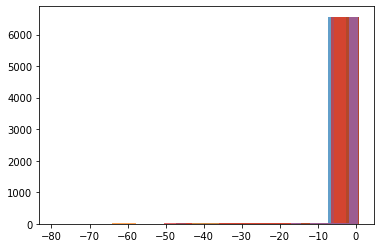

In [28]:
r2_orig_tr = r2_orig_seq.transpose()
for i in range(len(r2_orig_tr)) :
    plt.hist(r2_orig_tr[i],alpha=0.7)
plt.show()